In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from operator import itemgetter
import powerlaw
from networkx.drawing.nx_agraph import graphviz_layout
import pickle
from statistics import mean, stdev
import seaborn as sns

In [2]:
path_img = "../DataSet SuperUsers/2 - NetworkAnalysis/Graph_data/img_other_graph/"
path_graph = "../DataSet SuperUsers/2 - NetworkAnalysis/Graph_data/"

In [3]:
def degree_dist(G, name, directory):
    hist = nx.degree_histogram(G)
    plt.plot(range(0, len(hist)), hist, ".")
    plt.title(f"Degree Distribution for {name} graph")
    plt.xlabel("Degree")
    plt.ylabel("P(k)")
    plt.loglog()
    plt.savefig(path_img+directory+"/degree_dist_"+name+".png")
    plt.show()

In [4]:
def plot_dist(G, name, directory):
    M = nx.to_scipy_sparse_matrix(G)
    xmin = min([d[1] for d in G.degree()])
    indegrees = M.sum(0).A[0]
    degree = np.bincount(indegrees)
    fit = powerlaw.Fit(np.array(degree)+1, fit_method='KS')#, xmin=xmin, xmax=max(degree)-xmin,discrete=True)

In [7]:
fig = plt.figure(figsize=(16, 6)) 
print(f"**** Degree Distribution for {name} graph ****")
""" Plot Distribution """
plt.subplot(1, 3, 1)
plt.plot(range(len(degree)),degree,'b.')   
plt.loglog()
plt.xlim((min(degree), max(degree)))
plt.xlabel('Degree')
plt.ylabel('P(k)')

NameError: name 'name' is not defined

<Figure size 1152x432 with 0 Axes>

NameError: name 'fit' is not defined

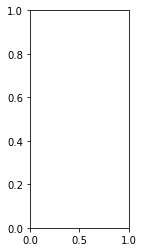

In [9]:
""" Plot CDF """
plt.subplot(1, 3, 2)
fit.plot_cdf()
plt.xlabel("Degree")
plt.ylabel('CDF')

NameError: name 'fit' is not defined

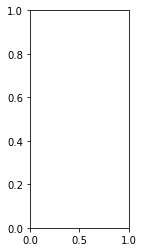

In [10]:
 """ Plot CCDF """
plt.subplot(1, 3, 3)
fit.power_law.plot_pdf(color='r',linestyle='--',label='fit ccdf')
fit.plot_ccdf()
plt.ylabel('CCDF')
plt.xlabel('Degree')
plt.tight_layout()
plt.savefig(path_img+directory+"/degree_distribution_compare_"+name+".png")
plt.show()
print(f'alpha={fit.power_law.alpha+1} sigma={fit.power_law.sigma}')

In [11]:
def info_degree(G, name):
    print(f"***** Degree info for {name} graph ***")
    degree_sequence = sorted([(d, n) for n, d in G.degree()], reverse=True)
    dmax = max(degree_sequence)
    print("Maximum degree:", dmax)
    dmin = min(degree_sequence)
    print("Minimum degree:", dmin)

In [12]:
def degree_dist_plot(models):
    graphs = []
    for model in models:
        graphs.append((models[model], model))
    fig = plt.figure(figsize=(16,8), dpi= 300)
    labels = []
    for i in graphs:
        print(f"Network - {i[1]}")
        degrees = i[0].degree()
        values = sorted(set([v for k, v in degrees]))
        hist = [[v for k, v in degrees].count(x) for x in values]
        labels.append(i[1])
        if(i[1] == "Real Network"):
            plt.loglog(values, hist, 'o-')
        else:
            plt.loglog(values, hist, 'o')
    fontsize = 15
    plt.yticks(fontsize=fontsize, alpha=1)
    plt.xlabel("Degree", fontsize=fontsize)
    plt.ylabel("Number of nodes", fontsize=fontsize)
    plt.title("Degree Distribution", fontsize=fontsize)
    plt.legend(labels, fontsize=fontsize)
    plt.grid(axis='both', alpha=.3)

(0.0, 200.0)

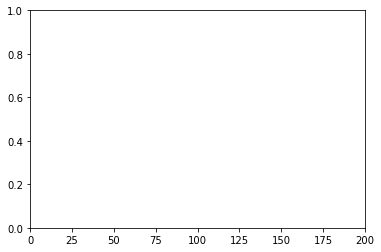

In [13]:
plt.xlim([0, 2*10**2])


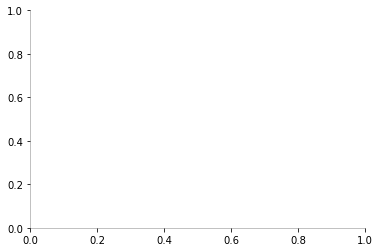

In [14]:
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show()

In [15]:
def n_connected_components(G, name):
    print(f"**** Connected components for {name} graph ****")
    # list of connected components
    n_connected_component = list(nx.connected_components(G))
    print(f"Number of Connected Components for {name}: {len(n_connected_component)}")
    for i in range(len(n_connected_component)):
        if i < 3:
            print(f"\t component len = {len(n_connected_component[i])}")
    # Giant component -> Identify and store giant component
    H = nx.Graph()
    H = nx.subgraph(G,n_connected_component[0])
    nx.write_graphml(G, path_graph+"giant_component/"+ name+".graphml")
    return n_connected_component

In [16]:
def path_analysis(G, name, components):
    print(f"***** Path analysis for {name} graph")
    print(f"Diameter for components 0 network {name}: {nx.diameter(G.subgraph(components[0]))}")
    print(f"Average shortest path for components 0 network {name}: {nx.average_shortest_path_length(G.subgraph(components[0]))}")


In [17]:
def avg_clust_coeff(G, name):
    print(f"{name} average cluster coefficient =  {nx.average_clustering(G)}")

In [18]:
def degree_clustering(G, name, directory):
    print(f"**** Distribution degree/clustering for {name} graph ***")
    degrees = G.degree()
    local_clustering_coefficient= []
    degree = []
     for d in degrees:
        local_clustering_coefficient.append(nx.clustering(G,d[0]))
        #print(local_clustering_coefficient)
        degree.append(d[1])
        
    plt.figure(figsize=(20,5))
    plt.scatter(degree, local_clustering_coefficient)

    plt.xlabel("k")
    plt.ylabel("C(k)")
    plt.savefig(path_img+directory+"/degree_clustering_"+name+".png")
    plt.show()


IndentationError: unexpected indent (<ipython-input-18-c9d246bc727e>, line 6)

In [19]:
def c_coefficient_analysis(G, name):
    #avg_clust_coeff(G, name)
    clustering_g = nx.clustering(G)
    print(f"*** Clustering coefficient analyssi for {name} graph ***")
    #print(f"CC: {clustering_g.values()}")
    print(f"Min: {min(clustering_g.values())}")
    print(f"Max: {max(clustering_g.values())}")
    print(f"Mean: {mean(clustering_g.values())}")
    print(f"Stdev: {stdev(clustering_g.values())}")
    return (name, clustering_g.values())

In [20]:
def density_analysis(G, name):
    print(f"Density for {name} graph: {nx.density(G)}")